# SVM
    

In [1]:
# Use Pandas to import as a data frame
import pandas as pd

train = pd.read_csv('data/train.csv')

In [2]:
# Split Training Data in half to allow cross validation
# The method,train_test_split divides our data set into 
# training and test data through randomization

from sklearn.cross_validation import train_test_split, ShuffleSplit

# Create a training set and a cross validation set using 50% of the data for cross validation

# dftrain, dfcross = train_test_split(train, test_size = 0.5)

# Set X and y
X = train.values
y = train['label'].values

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(42000, n_iter=3, test_size=0.2, random_state=None)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Check Data 

print "Checking for Null values... ", 
dftrain.isnull().all().any() or dftrain.duplicated().all()

Checking for Null values... 

NameError: name 'dftrain' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
# Set X and y for training and testing
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train = dftrain.values
X_test = dfcross.values

y_train = dftrain['label'].values
y_test = dfcross['label'].values


In [96]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

/Users/majickdave/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/majickdave/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [98]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

('accuracy:', 0.98345238095238097)
[[797   0   2   0   0   0   0   0   0   0]
 [  0 947   7   0   0   0   0   0   0   0]
 [  9  10 810   2   4   1   0   0   0   0]
 [  1   4   5 883   3   1   0   0   0   0]
 [  1   1   3   4 812   5   1   1   0   0]
 [  0   0   0   5   2 717   4   3   0   0]
 [  0   0   0   0   6  13 856   0   0   0]
 [  0   0   0   0   1   0   1 888   4   1]
 [  0   0   0   0   0   1   3   9 746   5]
 [  0   0   0   0   0   0   2   4  10 805]]


In [101]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(6711, 785)
(6711,)
[376 328 708 863 575 781 472 736 961 911]


[[-0.05219038  0.          0.         ...,  0.          0.          0.        ]
 [-0.80093695  0.          0.         ...,  0.          0.          0.        ]
 [-0.71801388  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [-0.78126563  0.          0.         ...,  0.          0.          0.        ]
 [-2.88572042  0.          0.         ...,  0.          0.          0.        ]
 [-2.70371197  0.          0.         ...,  0.          0.          0.        ]]


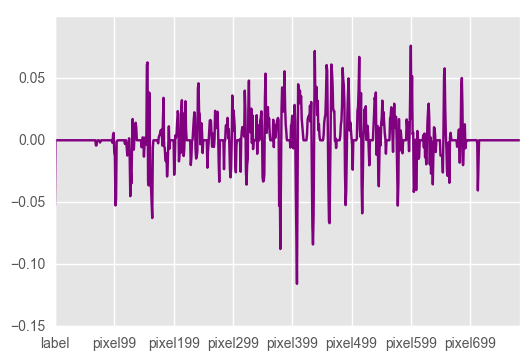

In [117]:
# if using linear kernel, these make sense to look at (not otherwise, why?)

import seaborn as sns


print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=train.columns)

sns = weights.plot(color = "purple")


### The plot above shows a high concentration of vectors in pixels 300-500

In [120]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = train.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.loc[svm_clf.support_,:]

df_support['label'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
train['label'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6711 entries, 73 to 33486
Columns: 785 entries, label to pixel783
dtypes: float64(784), int64(1)
memory usage: 40.2 MB
